# 이변량 분석

In [1]:
# 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic

import statsmodels.api as sm

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### 수치형 -> 수치형

In [2]:
# 데이터 불러오기
data = pd.read_csv('https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
# 불필요한 데이터 삭제
data.drop(['Income', 'Urban', 'Education'], axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,138,11,276,120,Bad,42,Yes
1,11.22,111,16,260,83,Good,65,Yes
2,10.06,113,10,269,80,Medium,59,Yes
3,7.40,117,4,466,97,Medium,55,Yes
4,4.15,141,3,340,128,Bad,38,No


In [4]:
# 타겟 데이터 지정
target = 'Sales'

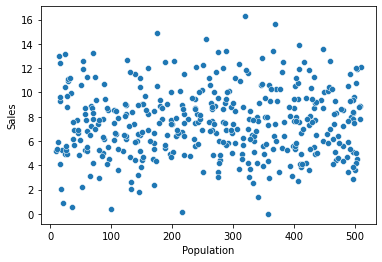

In [5]:
# 시각화
sns.scatterplot(x = 'Population', y = target, data = data)
plt.show()

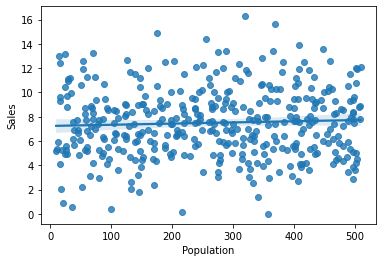

In [6]:
sns.regplot(x = 'Population', y = target, data = data)
plt.show()

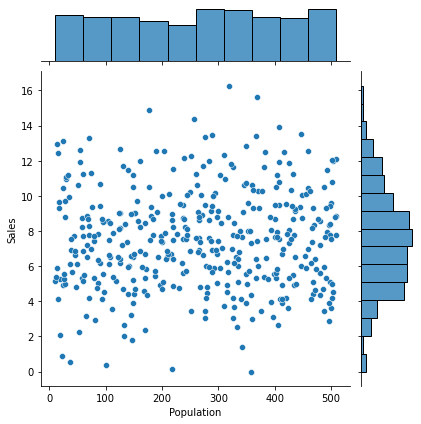

In [7]:
sns.jointplot(x = 'Population', y = target, data = data)
plt.show()

In [8]:
# 수치화
spst.pearsonr(data['Population'], data['Sales'])

(0.0504709844720392, 0.31398160931903)

### 범주형 -> 수치형

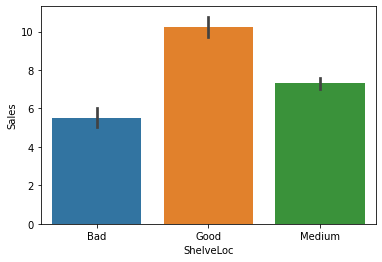

In [9]:
# 시각화
sns.barplot(x = 'ShelveLoc', y = target, data = data)
plt.show()

In [10]:
# 수치화
# t-test, anova
d_g = data.loc[data['ShelveLoc'] == 'Good', 'Sales']
d_m = data.loc[data['ShelveLoc'] == 'Medium', 'Sales']
d_b = data.loc[data['ShelveLoc'] == 'Bad', 'Sales']

spst.f_oneway(d_g, d_m, d_b)

F_onewayResult(statistic=92.22990509910349, pvalue=1.26693609015938e-33)

### 수치형 -> 범주형

In [11]:
# 데이터 불러오기
titanic = pd.read_csv('https://bit.ly/3FsgwkJ')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
feature = 'Age'
target = 'Pclass'

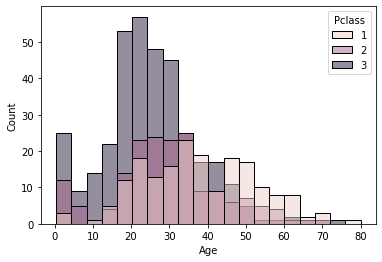

In [13]:
# 시각화
sns.histplot(x = feature, data = titanic, hue = target)
plt.show()

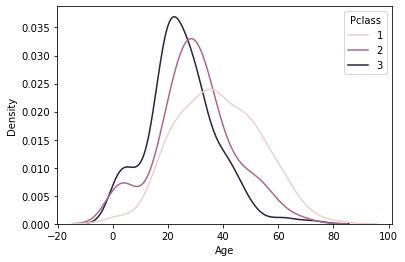

In [14]:
sns.kdeplot(x = feature, data = titanic, hue = target, common_norm = False)
plt.show()

In [15]:
# 수치화
# 로지스틱 회귀... 이건 크게 의미없다고 말씀하셨음.
temp = titanic.loc[titanic[feature].notnull()]

model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

ValueError: endog must be in the unit interval.

### 범주형 -> 범주형

In [16]:
feature = 'Sex'
target = 'Pclass'

In [17]:
# 교차표
pd.crosstab(titanic[feature], titanic[target], normalize = 'columns')

Pclass,1,2,3
Sex,,,
female,0.435185,0.413043,0.293279
male,0.564815,0.586957,0.706721


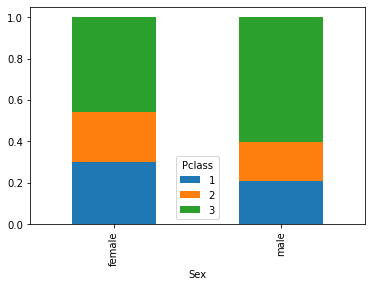

In [18]:
# 시각화
# Stacked Bar, Mosaic
temp = pd.crosstab(titanic[feature], titanic[target], normalize = 'index')
temp.plot.bar(stacked = True)
plt.show()

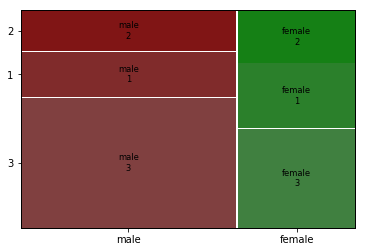

In [19]:
mosaic(titanic, [feature, target])
plt.show()

In [20]:
# 수치화
# 카이제곱검성
table = pd.crosstab(titanic[feature], titanic[target])
result = spst.chi2_contingency(table)
print(result)

(16.971499095517114, 0.00020638864348233114, 2, array([[ 76.12121212,  64.84399551, 173.03479237],
       [139.87878788, 119.15600449, 317.96520763]]))
